<a href="https://colab.research.google.com/github/LeraDoroshenko/ksvd/blob/main/%D0%9B%D0%A02_%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE%D0%92_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [5]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')
print(df.head())

Mounted at /content/drive
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   2

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None


In [7]:
print(df.describe())

               age      anaemia  creatinine_phosphokinase     diabetes  \
count  5000.000000  5000.000000               5000.000000  5000.000000   
mean     60.288736     0.474400                586.760600     0.439400   
std      11.697243     0.499394                976.733979     0.496364   
min      40.000000     0.000000                 23.000000     0.000000   
25%      50.000000     0.000000                121.000000     0.000000   
50%      60.000000     0.000000                248.000000     0.000000   
75%      68.000000     1.000000                582.000000     1.000000   
max      95.000000     1.000000               7861.000000     1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count        5000.000000          5000.000000    5000.000000   
mean           37.734600             0.364800  265075.404370   
std            11.514855             0.481422   97999.758622   
min            14.000000             0.000000   25100.000000   
25%          

In [8]:
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


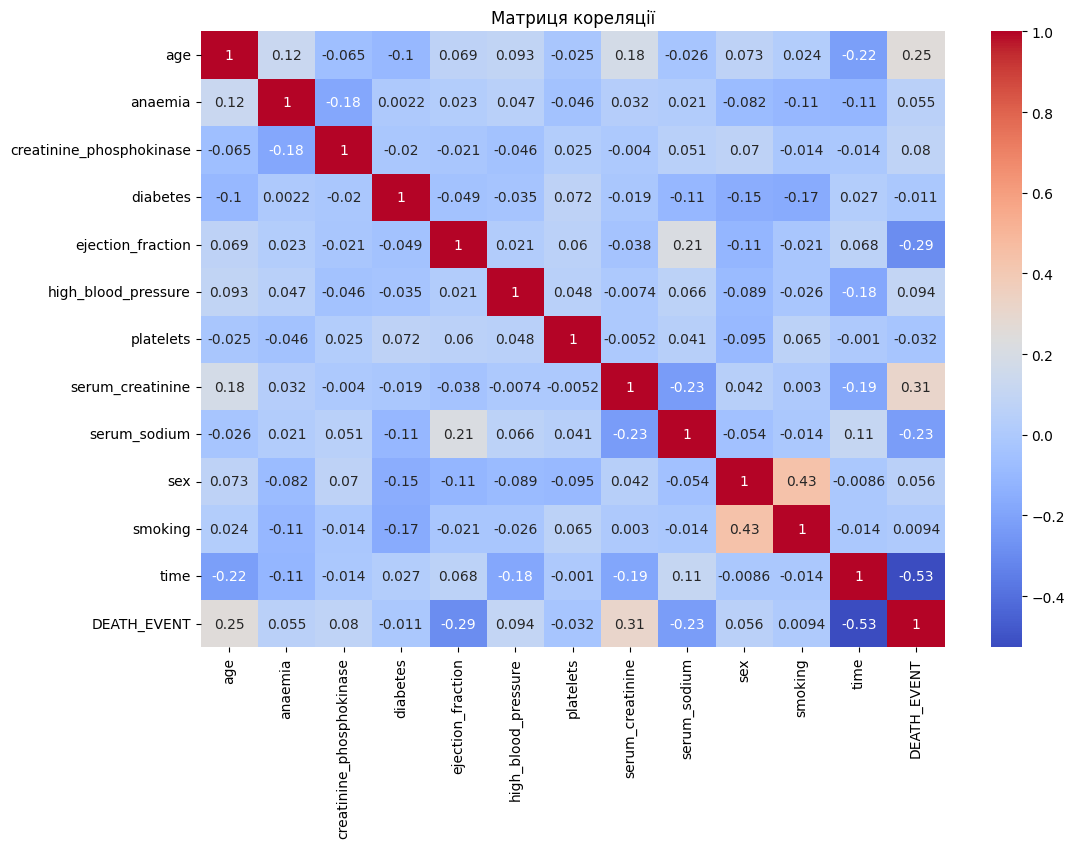

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

In [12]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression()
history = model.fit(X_train, y_train)

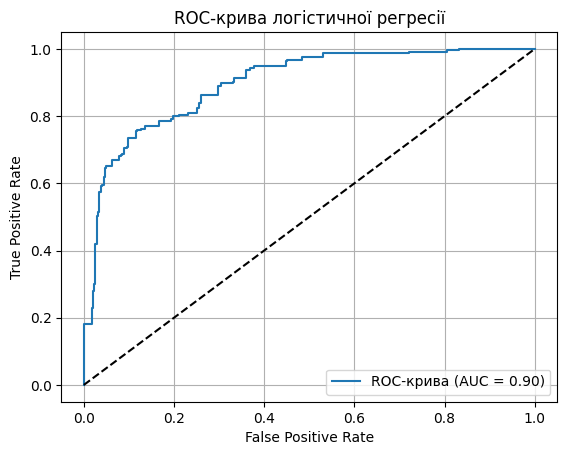

In [16]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC-крива (AUC = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива логістичної регресії')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [17]:
y_pred = model.predict(X_test)

In [19]:
print("\nМатриця плутанини:")
print(confusion_matrix(y_test, y_pred))

print("\nЗвіт класифікації:")
print(classification_report(y_test, y_pred))

print(f"Точність моделі: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")


Матриця плутанини:
[[629  69]
 [ 80 222]]

Звіт класифікації:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       698
           1       0.76      0.74      0.75       302

    accuracy                           0.85      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.85      0.85      0.85      1000

Точність моделі: 0.8510
AUC: 0.8970


Висновки:

Логістична регресія показала хорошу якість класифікації, досягнувши AUC 0.897 та точності 85.1%. Отже, можна сказати що здатність моделі розрізняти пацієнтів, які померли, від тих, хто вижив, висока.

Метрика AUC є основною при класифікації з незбалансованими класами, і значення 0.90 підтверджує хорошу якість моделі.

Логістична регресія може бути рекомендована як базова модель для задач прогнозування смертності пацієнтів із серцевою недостатністю.